In [2]:
import pandas as pd
import numpy as np
import warnings
import sketch
import seaborn
import matplotlib.pyplot as plt
import os

In [3]:
os.getcwd()

'C:\\Users\\AbhisheakSaraswat\\Desktop\\DataSet'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Python Pandas EDA.ipynb',
 'SalesData.xlsx',
 'Superstore.csv',
 'titanic_dataset.csv',
 'titanic_dataset_cleaned.csv',
 'univariate_analysis_quiz.csv']

In [24]:
df = pd.read_csv("Superstore.csv", encoding = "ISO-8859-1")

In [7]:
df.shape

(9994, 11)

In [8]:
df.head(2)

Order Date Customer Name   Segment       City     State Region   Category  \
0  08-11-2018   Claire Gute  Consumer  Henderson  Kentucky  South  Furniture   
1  08-11-2018   Claire Gute  Consumer  Henderson  Kentucky  South  Furniture   

  Sub-Category   Sales  Quantity    Profit  
0    Bookcases  261.96         2   41.9136  
1       Chairs  731.94         3  219.5820

In [9]:
df.sketch.ask("what is the shape of the data?")

In [10]:
df.sketch.ask("give me unique Region from dataframe?")

In [11]:
df.sketch.howto("can you display region wise sales using plotly?")

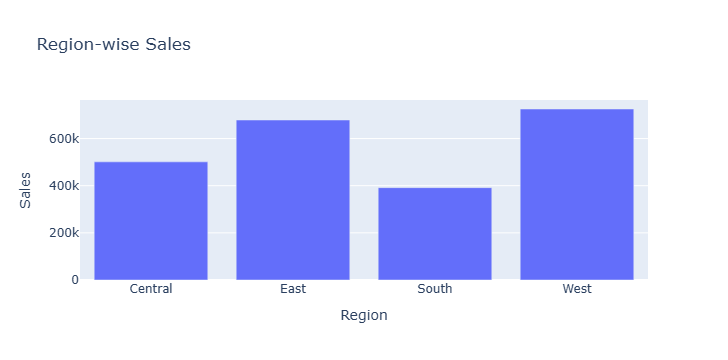

In [12]:
import plotly.express as px

# group the dataframe by region and sum the sales
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# create a bar chart using plotly
fig = px.bar(region_sales, x='Region', y='Sales', title='Region-wise Sales')

# display the chart
fig.show()


In [13]:
!pip install sketch --quiet

In [14]:
df.sketch.howto("can you display region and category wise sales using plotly?")

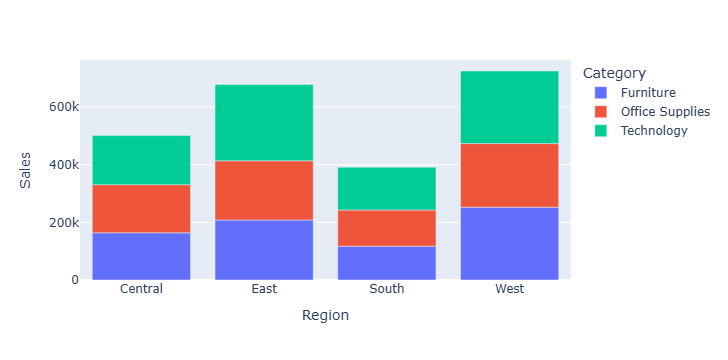

In [15]:
import plotly.express as px

# group the dataframe by region and category and sum the sales
sales_by_region_category = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# use plotly express to create a bar chart
fig = px.bar(sales_by_region_category, x='Region', y='Sales', color='Category')

# display the chart
fig.show()


In [16]:
df.sketch.ask("What is the use of Exploratory Data Analysis?")

In [19]:
df.sketch.ask("What kind of step we have to follow to Exploratory Data Analysis (Output in HTML list)?")

In [25]:
df.sketch.howto("can you perform summary statistics?")

In [26]:
df.sketch.howto("Display bar chart using seaborn based on Sales and Subcategory?")

<Axes: xlabel='Sub-Category', ylabel='Sales'>

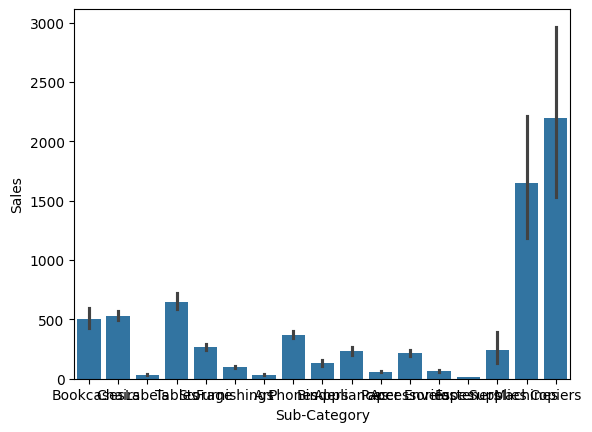

In [27]:
import seaborn as sns
sns.barplot(x='Sub-Category', y='Sales', data=df)


In [28]:
df.sketch.ask("Can you explain list data structure with multiple examples?")

### Core EDA based on any dataset

In [32]:
df = pd.read_csv('titanic_dataset.csv')

In [33]:
df.shape

(891, 12)

In [34]:
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [35]:
pd.__version__

'2.2.3'

In [36]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [39]:
# Dropping this column
df.drop("Cabin", axis = 1, inplace = True)

In [40]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [41]:
# Age column is filled with the meadian of the column to avoid any biases caused by extrem values
df['Age'].isnull().sum()

177

In [42]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [43]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [44]:
df = df.dropna()

In [45]:
df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [46]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [47]:
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [48]:
df.to_csv('titanic_dataset_cleaned.csv', index = False)

In [52]:
df.reset_index(inplace=True)
df.drop("index", axis = 1, inplace = True)

C:\Users\AbhisheakSaraswat\AppData\Local\Temp\ipykernel_32844\741906818.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


In [54]:
df.shape

(889, 11)

# List of Continuous (Numerical) columns in the dataset

In [56]:
# df.select_dtypes(include = 'int')

In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [58]:
coun_cols = ['Fare','Age']
cat_cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
id_cols = ['PassengerId','Name','Ticket']

### Univariate Analysis:

<Axes: xlabel='Embarked'>

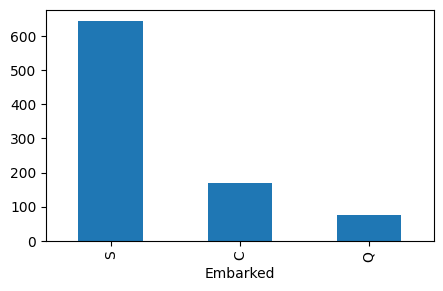

In [66]:
plt.figure(figsize=(5,3))
df.Embarked.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

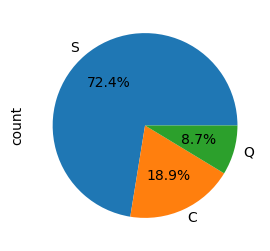

In [67]:
plt.figure(figsize=(5,3))
df.Embarked.value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Embarked', ylabel='count'>

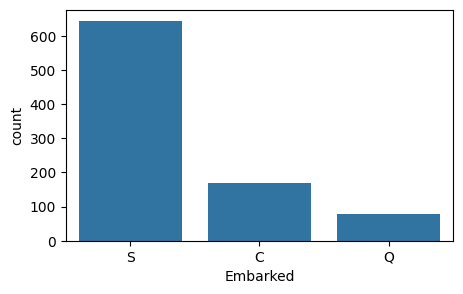

In [69]:
plt.figure(figsize=(5,3))
sns.countplot(x = df['Embarked'])

### KDE : Kernel Density Plot

In [70]:
df.sketch.ask("What does KDE (kernal density plot)?")

<Axes: ylabel='Density'>

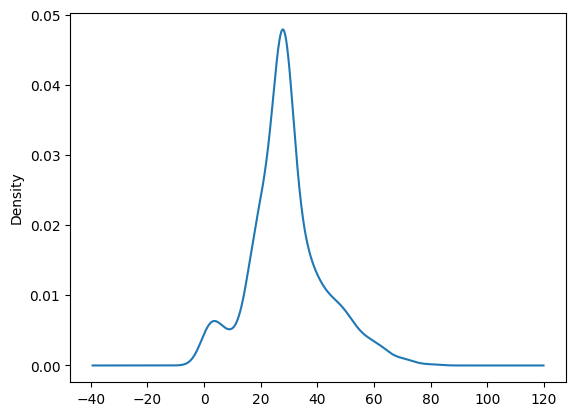

In [71]:
df.Age.plot(kind='kde')

In [72]:
df['SibSp'].describe()

count    889.000000
mean       0.524184
std        1.103705
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

Column Name:  Fare


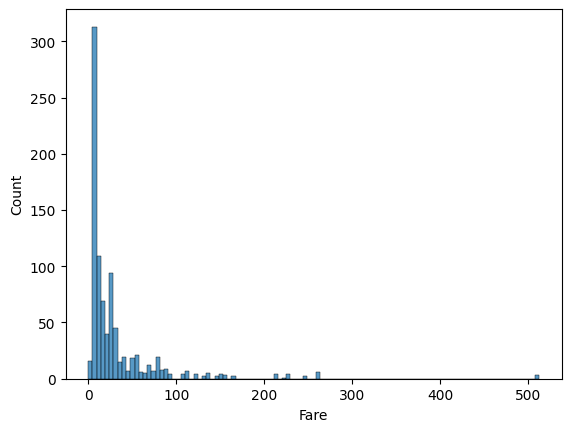

Column Name:  Age


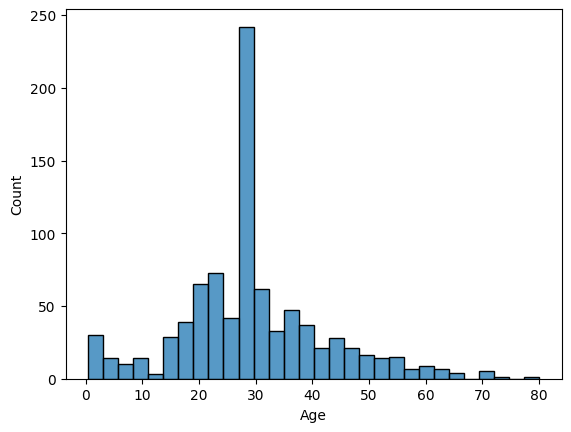

In [73]:
for col in coun_cols:
    print("Column Name: ", col)
    sns.histplot(df[col])
    plt.show()

### Boxplot

<Axes: ylabel='Fare'>

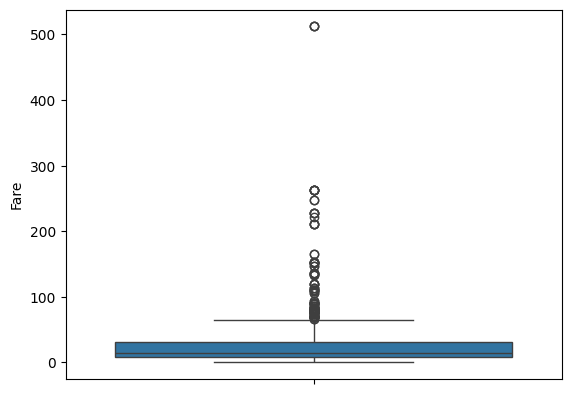

In [74]:
sns.boxplot(df.Fare)

In [75]:
df.sketch.howto("create boxplot using plotly based on Fare column?")

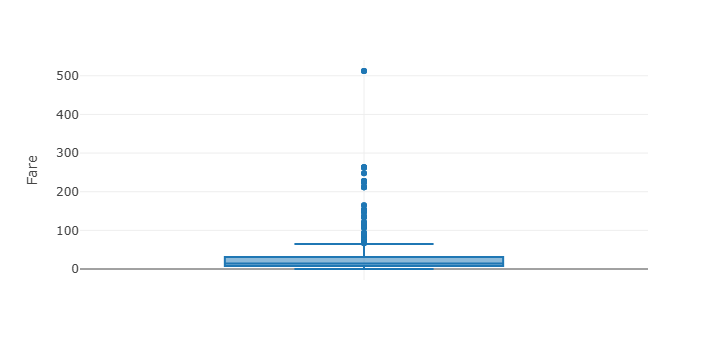

In [77]:
import plotly.express as px

fig = px.box(df, y="Fare",template = 'gridon')
fig.show()


<Axes: ylabel='Age'>

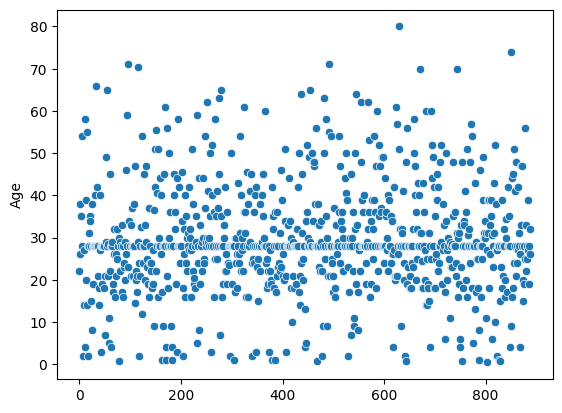

In [78]:
sns.scatterplot(df.Age)

In [80]:
tips = sns.load_dataset('tips')
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

In [82]:
print(sns.pairplot.__doc__)

Plot pairwise relationships in a dataset.

    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.

    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.

    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need more flexibility.

    Parameters
    ----------
    data : `pandas.DataFrame`
        Tidy (long-form) dataframe where each column is a variable and
        each row is an observation.
    hue : name of variable in ``data``
        Variable in ``data`` to map plot aspects to different colors.
    hue_order

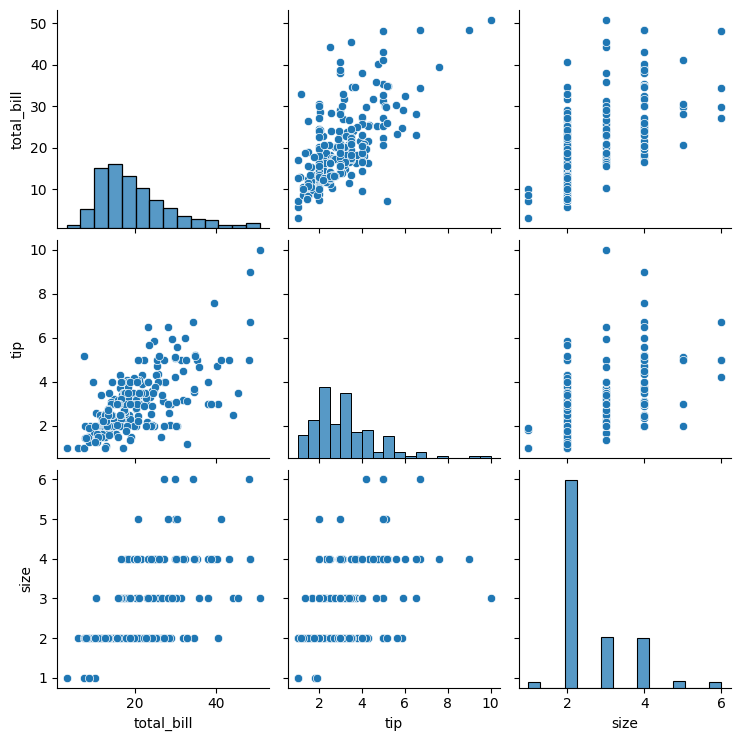

In [83]:
sns.pairplot(tips)

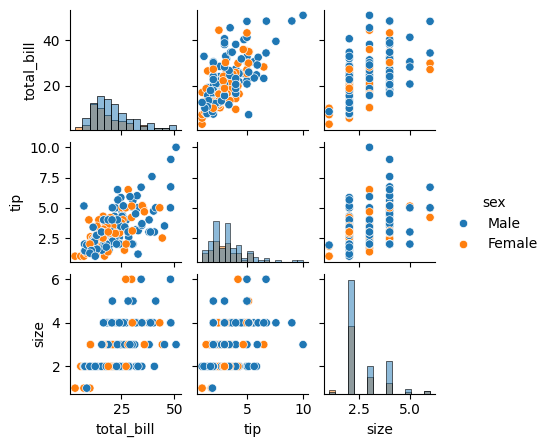

In [90]:
sns.pairplot(tips, hue = "sex", diag_kind="hist", height = 1.5)

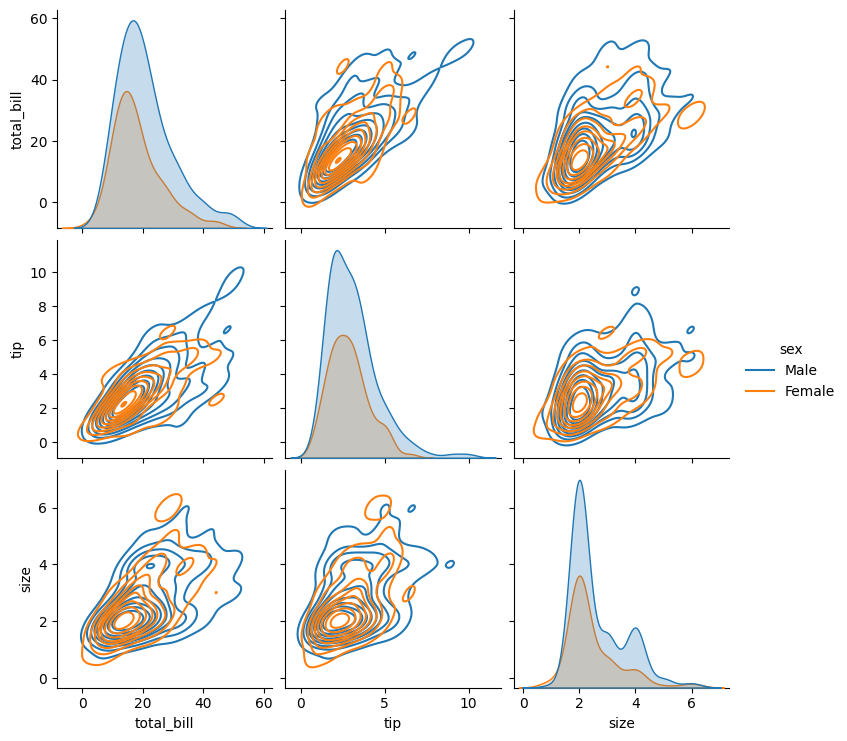

In [89]:
sns.pairplot(tips, hue = "sex", kind="kde")

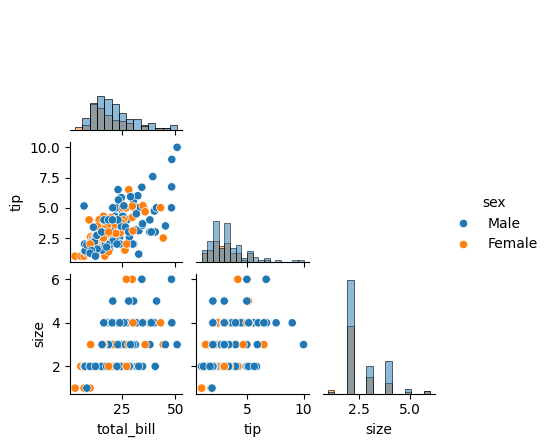

In [91]:
sns.pairplot(tips, hue = "sex", diag_kind="hist", height = 1.5, corner = True)

In [92]:
df.sketch.ask("What is the use of heatmap and how we can apply using plotly based on Fare column")

In [93]:
df_quiz = pd.read_csv("univariate_analysis_quiz.csv")

In [94]:
df_quiz.head()

OrderID  CustomerID  ProductID   Price  Ratings  Number_of_Reviews  \
0        1          54         73  487.25     1.65                308   
1        2         116         85   51.67     2.52                352   
2        3         118         80  609.13     2.68                133   
3        4         128         36  816.86     1.19                 37   
4        5          75         51   84.29     4.20                356   

   CategoryID  Age Gender Location  Order_Date  
0           7   31  Other   Mumbai  2023-10-15  
1          19   47  Other    Surat  2023-08-22  
2          11   34   Male  Kolkata  2023-04-29  
3          19   58  Other    Surat  2023-05-20  
4           1   41   Male     Pune  2022-10-19

In [95]:
df_quiz.sketch.ask("can you give friendly names of each column with description (show me output in html format?")

In [96]:
df_quiz.columns

Index(['OrderID', 'CustomerID', 'ProductID', 'Price', 'Ratings',
       'Number_of_Reviews', 'CategoryID', 'Age', 'Gender', 'Location',
       'Order_Date'],
      dtype='object')

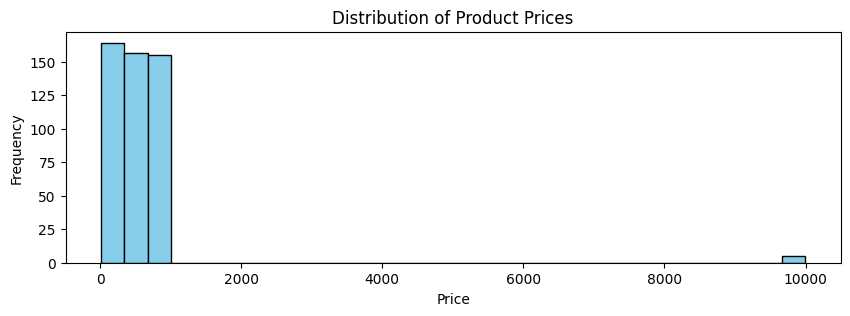

In [98]:
plt.figure(figsize = (10,3))
plt.hist(df_quiz['Price'], bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.show()

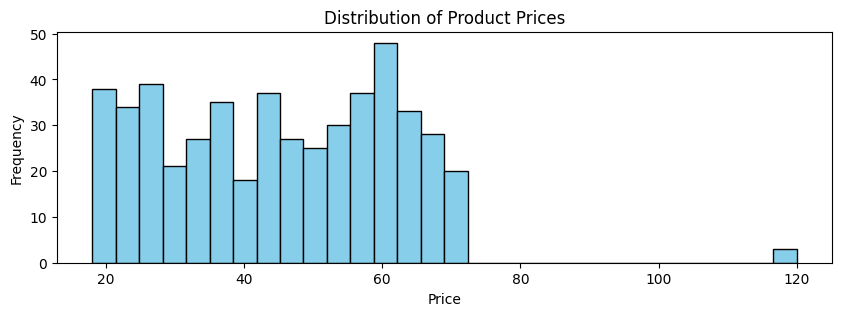

In [99]:
plt.figure(figsize = (10,3))
plt.hist(df_quiz['Age'], bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.show()

In [100]:
df_quiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            500 non-null    int64  
 1   CustomerID         500 non-null    int64  
 2   ProductID          500 non-null    int64  
 3   Price              480 non-null    float64
 4   Ratings            485 non-null    float64
 5   Number_of_Reviews  500 non-null    int64  
 6   CategoryID         500 non-null    int64  
 7   Age                500 non-null    int64  
 8   Gender             500 non-null    object 
 9   Location           500 non-null    object 
 10  Order_Date         500 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 43.1+ KB


In [101]:
df_quiz_cleaned = df_quiz.dropna(subset=['Ratings'])

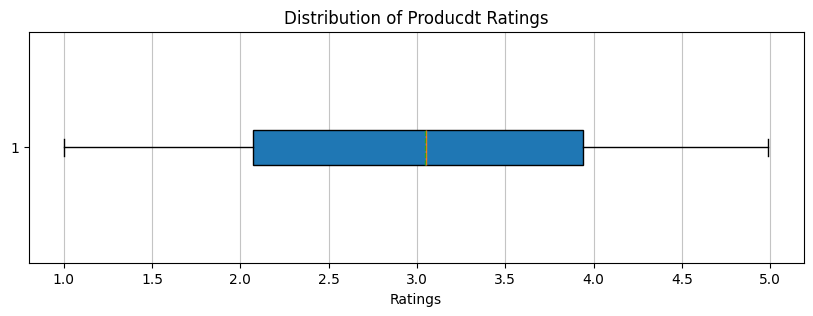

In [106]:
plt.figure(figsize = (10,3))
plt.boxplot(df_quiz_cleaned['Ratings'],meanline = True, vert=False, showmeans=True,
           patch_artist=True)
plt.title("Distribution of Producdt Ratings")
plt.xlabel("Ratings")
plt.grid(axis ='x', alpha = 0.75)
plt.show()

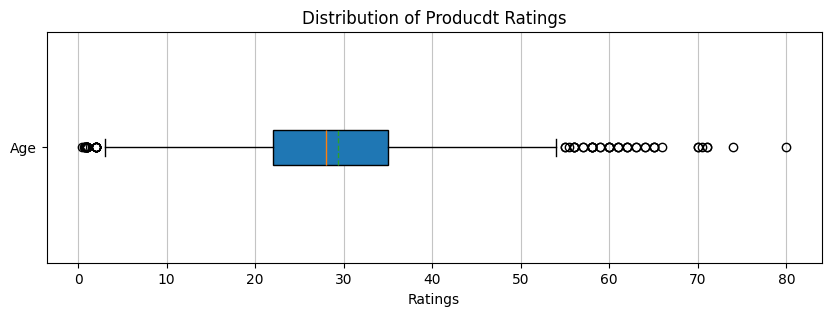

In [108]:
plt.figure(figsize = (10,3))
plt.boxplot(df['Age'],meanline = True, vert=False, showmeans=True,tick_labels=['Age'],
           patch_artist=True)
plt.title("Distribution of Producdt Ratings")
plt.xlabel("Ratings")
plt.grid(axis ='x', alpha = 0.75)
plt.show()

### Bivariate_MultiVariate_Analysis

<Axes: xlabel='Pclass', ylabel='Fare'>

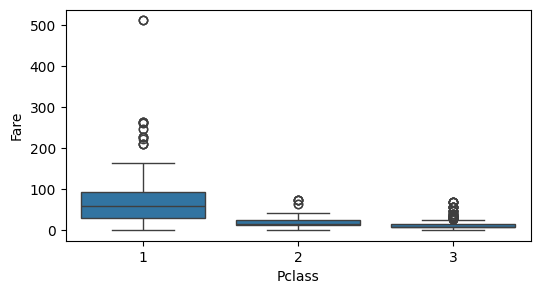

In [110]:
plt.figure(figsize=(6,3))
sns.boxplot(x = df['Pclass'], y = df['Fare'])

Survived vs Fare


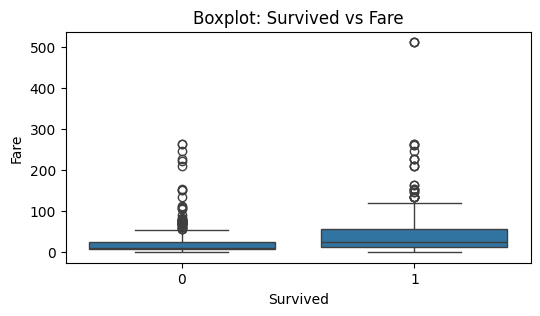

Survived vs Age


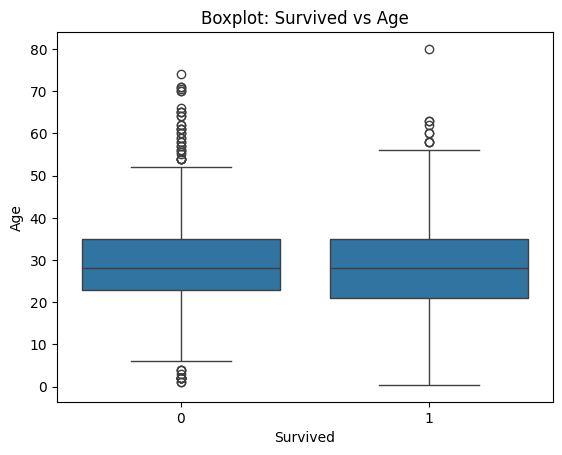

Pclass vs Fare


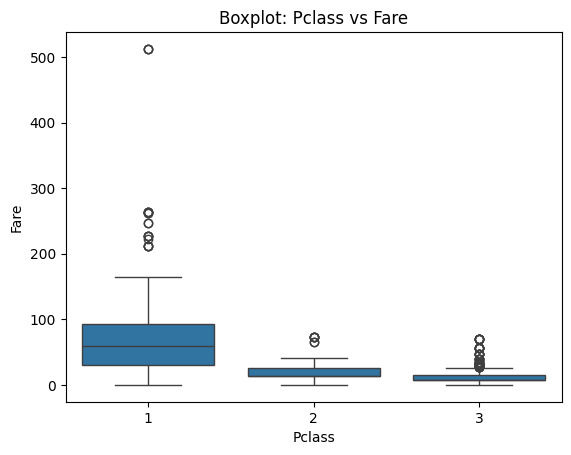

Pclass vs Age


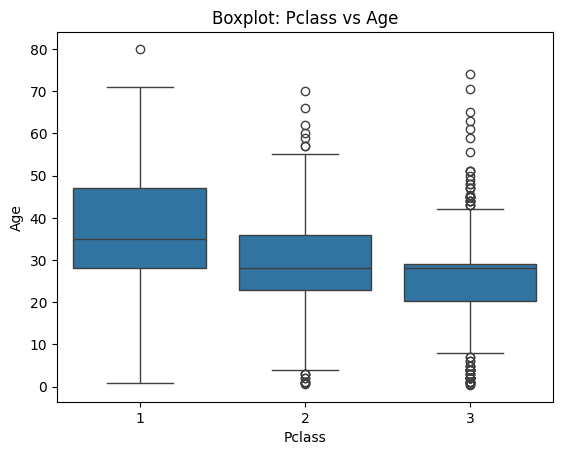

Sex vs Fare


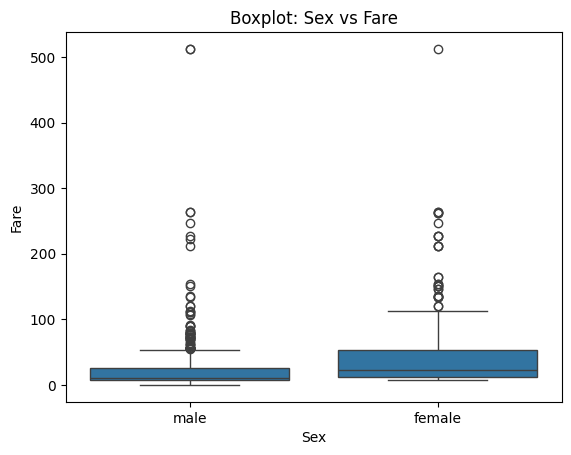

Sex vs Age


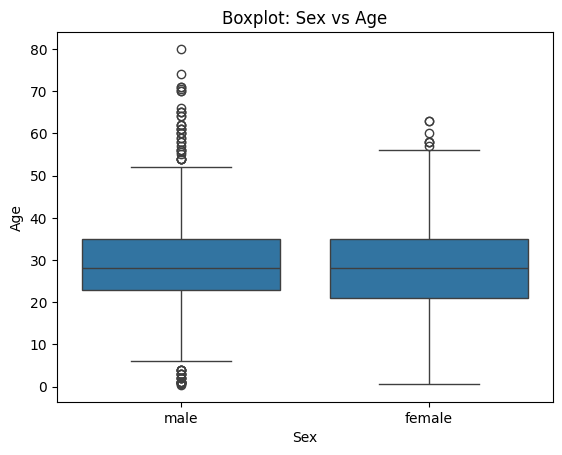

SibSp vs Fare


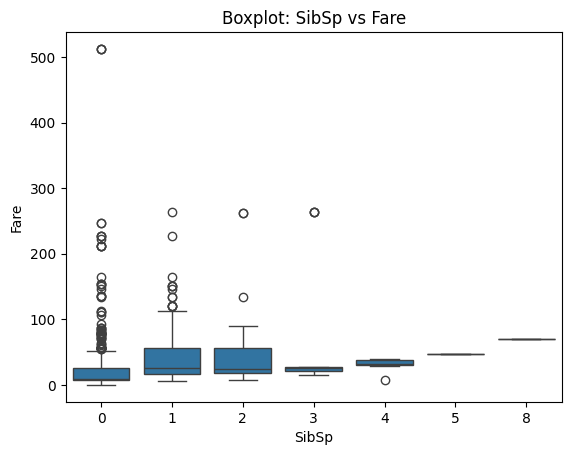

SibSp vs Age


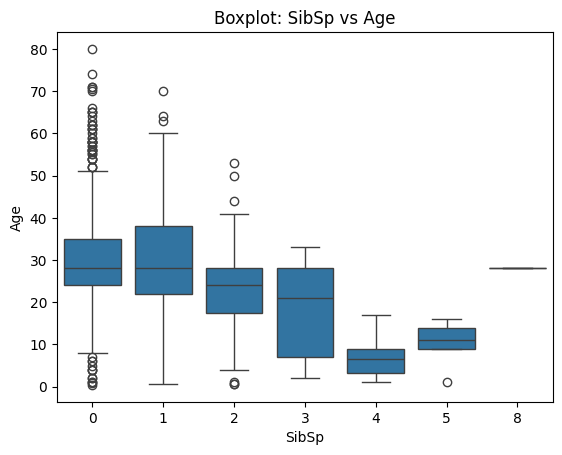

Parch vs Fare


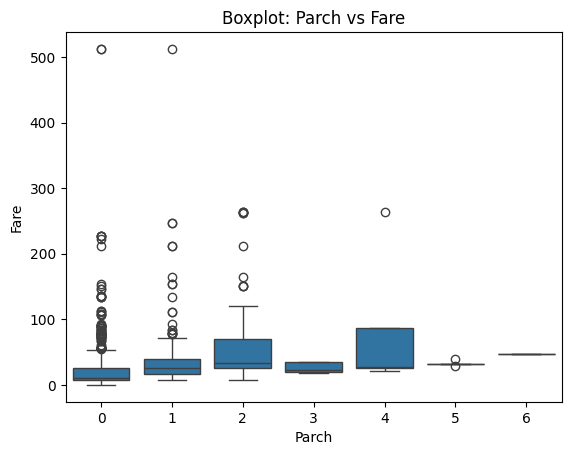

Parch vs Age


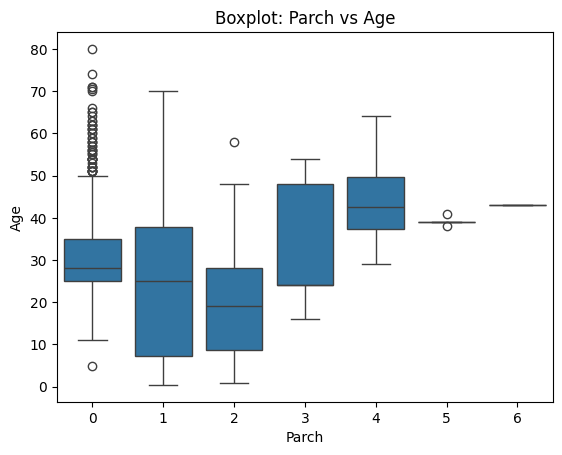

Embarked vs Fare


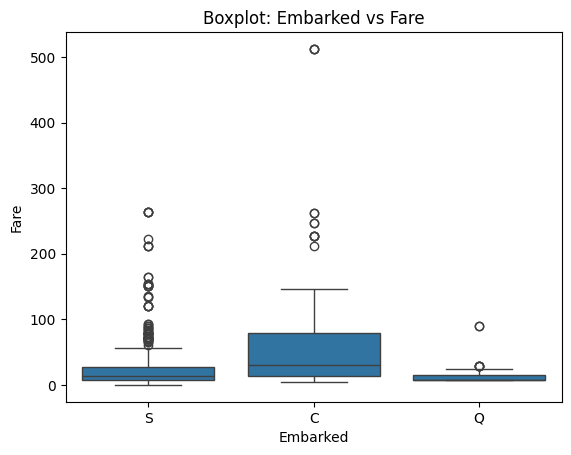

Embarked vs Age


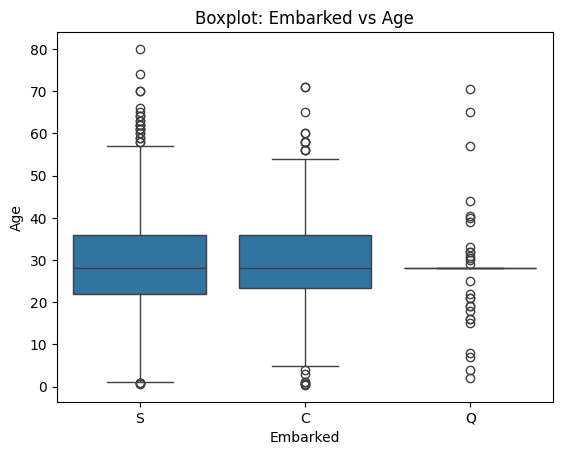

In [111]:
plt.figure(figsize=(6,3))
lstOfItems = []
for i in cat_cols:
    for j in coun_cols:
        print(i, 'vs', j)
        lstOfItems.append((i,j))
        sns.boxplot(x=df[i], y = df[j])
        plt.title(f'Boxplot: {i} vs {j}')
        plt.show()

In [112]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Figure size 400x300 with 0 Axes>

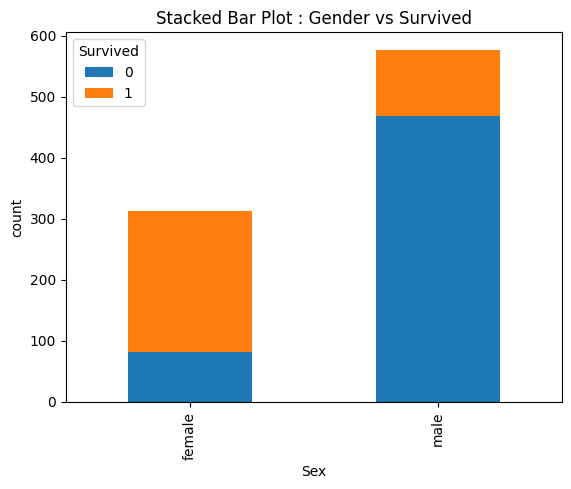

In [116]:
plt.figure(figsize=(4,3))
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', stacked=True)
plt.title("Stacked Bar Plot : Gender vs Survived")
plt.ylabel('count')
plt.show()

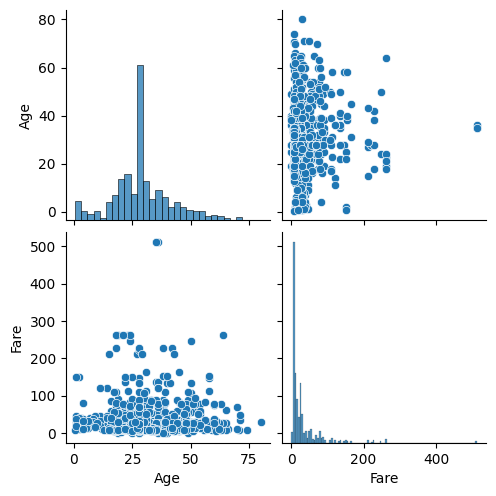

In [117]:
sns.pairplot(df[['Age','Fare']].dropna())

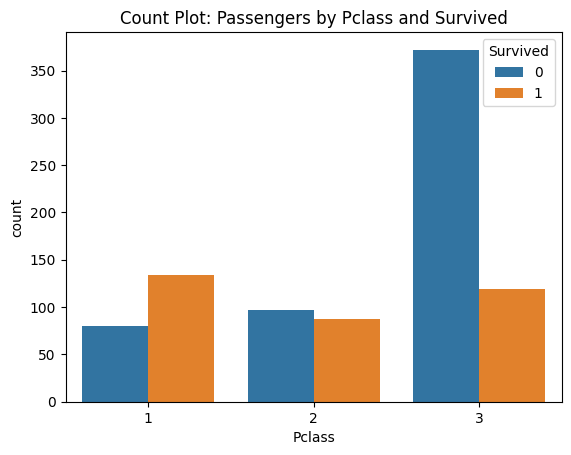

In [118]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
plt.title("Count Plot: Passengers by Pclass and Survived")
plt.show()

### Multivariate Analysis:

<Axes: xlabel='Age', ylabel='Fare'>

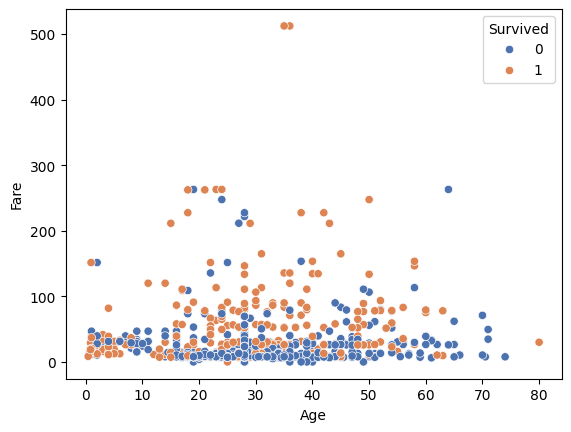

In [119]:
sns.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Survived', palette='deep')

<Axes: xlabel='Pclass', ylabel='Age'>

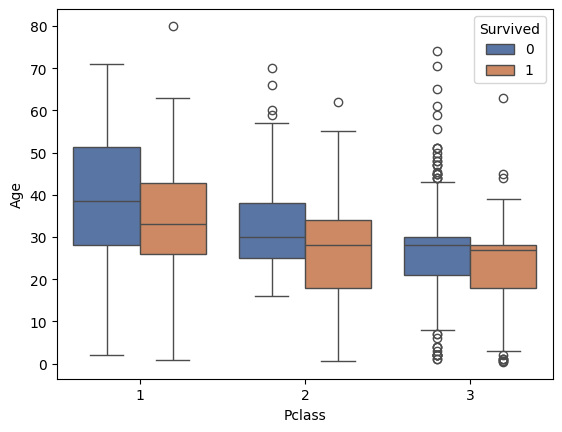

In [120]:
sns.boxplot(data = df, x = 'Pclass', y = 'Age', hue = 'Survived', palette='deep')

In [121]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

<Axes: xlabel='Pclass', ylabel='Age'>

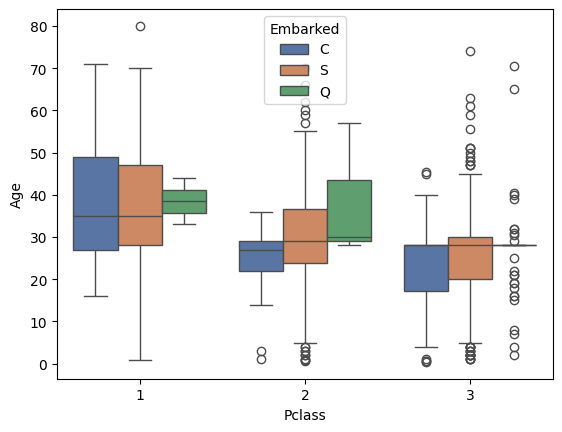

In [126]:
sns.boxplot(data = df, x = 'Pclass', y = 'Age', hue = 'Embarked', palette='deep')

In [128]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

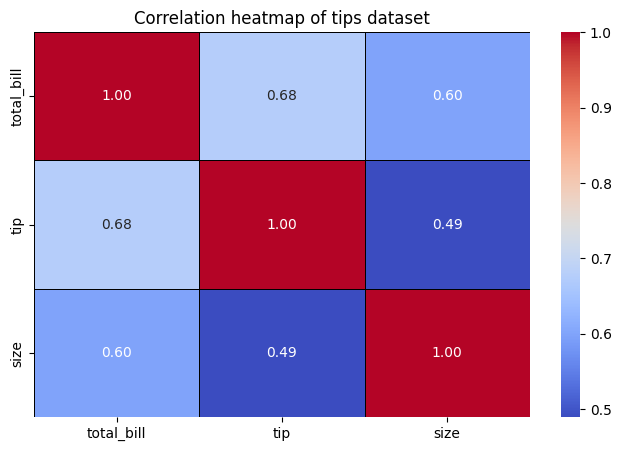

In [135]:
newdf = tips.select_dtypes(include = ['int','float'])
corr = newdf.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot = True, cmap='coolwarm', fmt = ".2f", linewidths=0.5, linecolor='black')
plt.title('Correlation heatmap of tips dataset')
plt.show()

In [132]:
corr

total_bill   tip  size
0         16.99  1.01     2
1         10.34  1.66     3
2         21.01  3.50     3
3         23.68  3.31     2
4         24.59  3.61     4
..          ...   ...   ...
239       29.03  5.92     3
240       27.18  2.00     2
241       22.67  2.00     2
242       17.82  1.75     2
243       18.78  3.00     2

[244 rows x 3 columns]

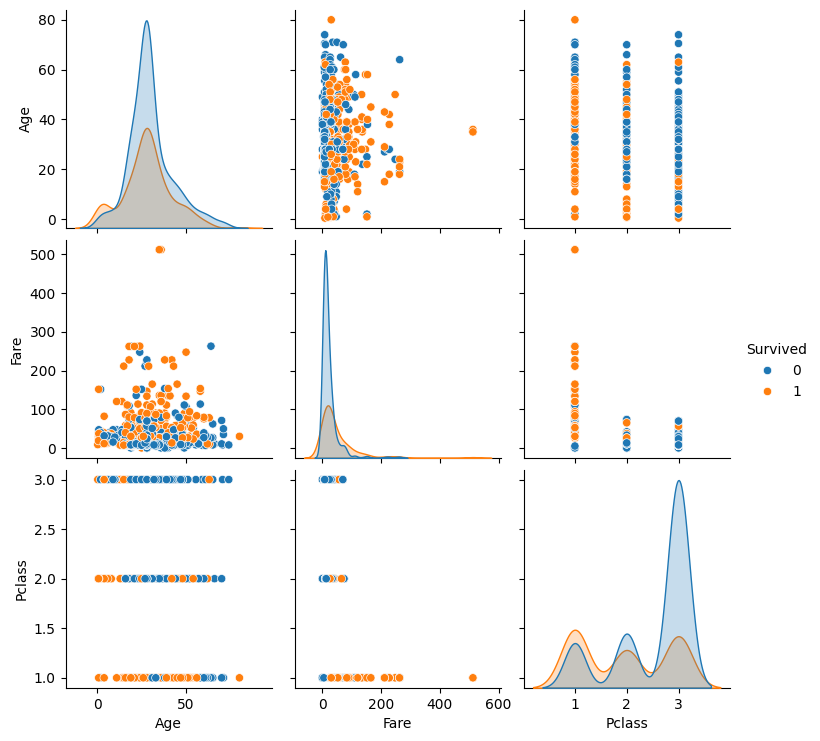

In [137]:
sns.pairplot(df[['Age','Fare','Pclass','Survived']].dropna(), hue='Survived')

<Axes: >

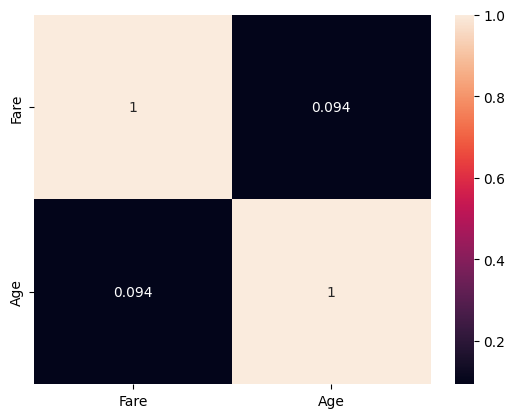

In [139]:
sns.heatmap(df[coun_cols].corr(),annot=True)

<Axes: >

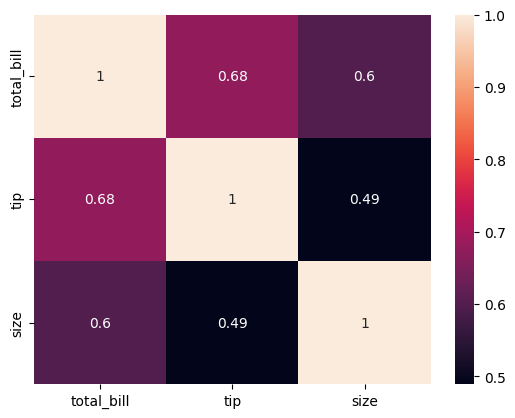

In [143]:
sns.heatmap(tips.corr(numeric_only=True), annot = True)

In [147]:
df_quiz.columns

Index(['OrderID', 'CustomerID', 'ProductID', 'Price', 'Ratings',
       'Number_of_Reviews', 'CategoryID', 'Age', 'Gender', 'Location',
       'Order_Date'],
      dtype='object')

In [148]:
sales = pd.read_csv("Superstore.csv", encoding = "ISO-8859-1")

In [149]:
sales.head(2)

Order Date Customer Name   Segment       City     State Region   Category  \
0  08-11-2018   Claire Gute  Consumer  Henderson  Kentucky  South  Furniture   
1  08-11-2018   Claire Gute  Consumer  Henderson  Kentucky  South  Furniture   

  Sub-Category   Sales  Quantity    Profit  
0    Bookcases  261.96         2   41.9136  
1       Chairs  731.94         3  219.5820

<Axes: xlabel='Category', ylabel='Quantity'>

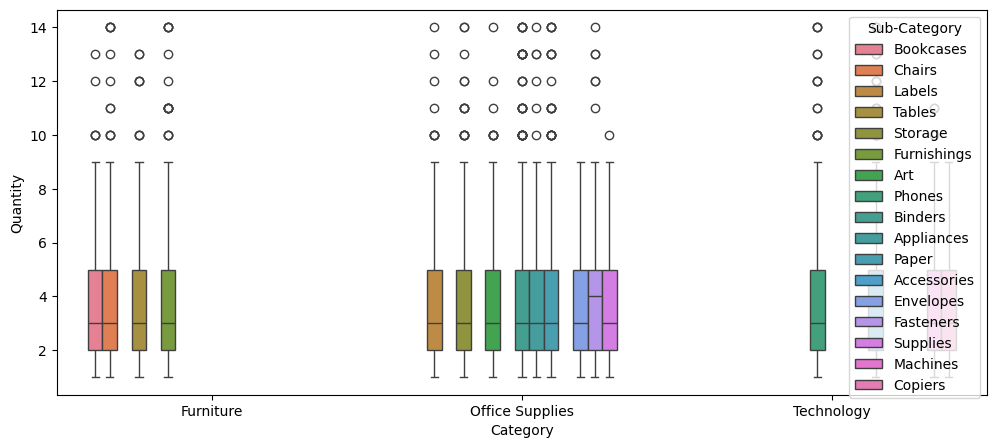

In [154]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'Category', y = "Quantity", hue = 'Sub-Category', data = sales)

In [169]:
path = os.environ['userprofile'] + "\\Downloads\\Sample - Superstore (2).xls"

In [174]:
superstore = pd.read_excel(path, sheet_name = None)

In [173]:
pd.ExcelFile(path).sheet_names

['Orders', 'Returns', 'People']

In [175]:
superstore.keys()

dict_keys(['Orders', 'Returns', 'People'])

In [178]:
superstore['People']

Person   Region
0      Anna Andreadi     West
1        Chuck Magee     East
2     Kelly Williams  Central
3  Cassandra Brandow    South

In [187]:
df = pd.read_excel(r"C:\Users\AbhisheakSaraswat\Downloads\census+data.xlsx", header = None,
                  skiprows=1)

In [188]:
df.head(2)

0      1       2          3       4          5          6    7    8   \
0  Table  State  Distt.  Area Name  Total/  Age-group      Total  NaN  NaN   
1   Name   Code    Code        NaN  Rural/        NaN        NaN  NaN  NaN   

           9   ...   35                                36   37   38  \
0  Illiterate  ...  NaN                               NaN  NaN  NaN   
1         NaN  ...  NaN  Technical diploma or certificate  NaN  NaN   

                 39   40   41            42   43   44  
0               NaN  NaN  NaN           NaN  NaN  NaN  
1  Graduate & above  NaN  NaN  Unclassified  NaN  NaN  

[2 rows x 45 columns]

In [202]:
import numpy as np

In [205]:
result = df.iloc[0].reset_index()
finalItem = result[0].to_list()[:10]

In [206]:
finalItem

['Table',
 'State',
 'Distt.',
 'Area Name',
 'Total/',
 'Age-group',
 '    Total',
 nan,
 nan,
 'Illiterate']

In [207]:
df.drop(0, inplace = True)

In [213]:
df.drop([3,4,5], inplace = True)

In [215]:
df.head(2)

0   1    2      3      4         5           6          7          8   \
6  C2308  00  000  INDIA  Total  All ages  1210854977  623270258  587584719   
7  C2308  00  000  INDIA  Total       0-6   164515253   85752254   78762999   

          9   ...      35       36       37       38        39        40  \
6  447216165  ...  345724  7238719  5354161  1884558  68288971  42120460   
7  164515253  ...       0        0        0        0         0         0   

         41       42       43       44  
6  26168511  3031570  1647116  1384454  
7         0        0        0        0  

[2 rows x 45 columns]

In [216]:
df.columns = fin

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='int64')

In [218]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler